In [24]:
!pip install geopandas

     |████████████████████████████████| 1.1 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 84.2 MB/s eta 0:00:01
     |████████████████████████████████| 26.5 MB 92.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 42.8 MB/s eta 0:00:01


In [25]:

import requests
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

url = 'http://api.open-notify.org/iss-now.json'

def get_data():
    r = requests.get(url)
    return (r.json())
 

In [29]:
data = {
    'latitude': [],
    'longitude': []
}

def main(): 
    
    while(True):
        result = get_data()
        print(result)

        data['longitude'].append(result['iss_position']['longitude'])
        data['latitude'].append(result['iss_position']['latitude'])
        
        time.sleep(5)

main()


{'iss_position': {'latitude': '-29.4039', 'longitude': '49.6989'}, 'timestamp': 1668227738, 'message': 'success'}
{'iss_position': {'latitude': '-29.6302', 'longitude': '49.9425'}, 'timestamp': 1668227743, 'message': 'success'}
{'iss_position': {'latitude': '-29.8559', 'longitude': '50.1872'}, 'timestamp': 1668227748, 'message': 'success'}
{'iss_position': {'latitude': '-30.1035', 'longitude': '50.4577'}, 'timestamp': 1668227753, 'message': 'success'}


KeyboardInterrupt: 

In [32]:
df = pd.DataFrame(data)
df.head()

,latitude,longitude
0,-29.4039,49.6989
1,-29.6302,49.9425
2,-29.8559,50.1872
3,-30.1035,50.4577


In [26]:
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


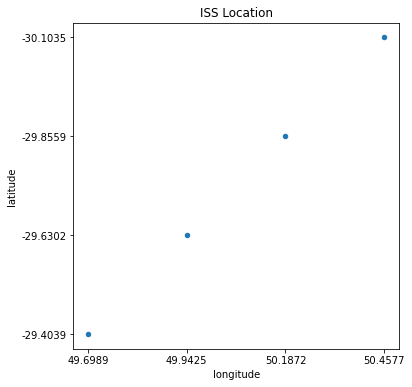

In [41]:
fig, ax = plt.subplots(figsize=(16,6))

countries.plot(color="lightgrey", ax=ax)

df.plot(x="longitude", y="latitude", kind="scatter", title=f"ISS Location", ax=ax)

plt.show()